In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import k, eV

In [2]:
# Define partition functions

def partition_function_isolated(T):
    Z = 14 # The energy of all states is zero，Z = 14
    return Z

def partition_function_soc(T):
    E1 = 0.28 * eV
    Z = 6 + 8 * np.exp(-E1 / (k * T)) # 6 lower-energy level (energy = 0), plus 8 higher-energy level (energy = 0.28 eV)
    return Z

def partition_function_soc_cfs(T):
    E1 = 0.12 * eV # 0.12 eV higher that the lowest energy level (E0, 0 eV)
    E2 = E1 + 0.13 * eV # 0.13 eV higher than E1
    E3 = E2 + 0.07 * eV # 0.07 eV higher than E2
    E4 = E3 + 0.14 * eV # 0.14 eV higher than E3
    Z = 4 + 2 * np.exp(-E1 / (k * T)) + 2 * np.exp(-E2 / (k * T)) + 4 * np.exp(-E3 / (k * T)) + 2 * np.exp(-E4 / (k * T)) # Sum of 5 different energy levels
    return Z

In [3]:
def thermodynamic_properties(T, Z_function):
    
    Z = Z_function(T) 
    beta = 1 / (k * T)
    delta = 1e-6 # Set a small step for numerical differentiation
    
    # Compute internal energy
    d_ln_Z = (np.log(Z_function(T + delta)) - np.log(Z_function(T - delta))) / (2 * delta)
    d_beta = ((1 / (k * (T + delta))) - (1 / (k * (T - delta)))) / (2 * delta)
    U = - d_ln_Z / d_beta

    # Compute free energy
    F = -k * T * np.log(Z)
    
    # Comoute entropy
    d_F = ((-k * T * np.log(Z_function(T + delta))) - (-k * T * np.log(Z_function(T - delta)))) / (2 * delta)
    d_T = delta
    S = -d_F / d_T
    
    return U, F, S

In [4]:
# Set the temperature range
T_range = np.linspace(300, 2000, 1701)

# Create a list to save the results
results = []

# Compute thermodynamic properties of Ce3+ in different environments
for T in T_range:
    # Isolated Ce3+
    U_iso, F_iso, S_iso = thermodynamic_properties(T, partition_function_isolated)
    results.append([T, U_iso, F_iso, S_iso, 'Isolated Ce3+'])
    
    # Ce3+ with SOC
    U_soc, F_soc, S_soc = thermodynamic_properties(T, partition_function_soc)
    results.append([T, U_soc, F_soc, S_soc, 'Ce3+ with SOC'])
    
    # Ce3+ with SOC & CFS
    U_soc_cfs, F_soc_cfs, S_soc_cfs = thermodynamic_properties(T, partition_function_soc_cfs)
    results.append([T, U_soc_cfs, F_soc_cfs, S_soc_cfs, 'Ce3+ with SOC & CFS'])

In [5]:
df = pd.DataFrame(results, columns=["Temperature (K)", "Internal Energy (J)", "Free Energy (J)", "Entropy (J/K)", "Case"])

# Save the resultes to a CSV file
df.to_csv('Thermodynamic_Properties_of_Ce(3)_in_Different_Environments.csv')

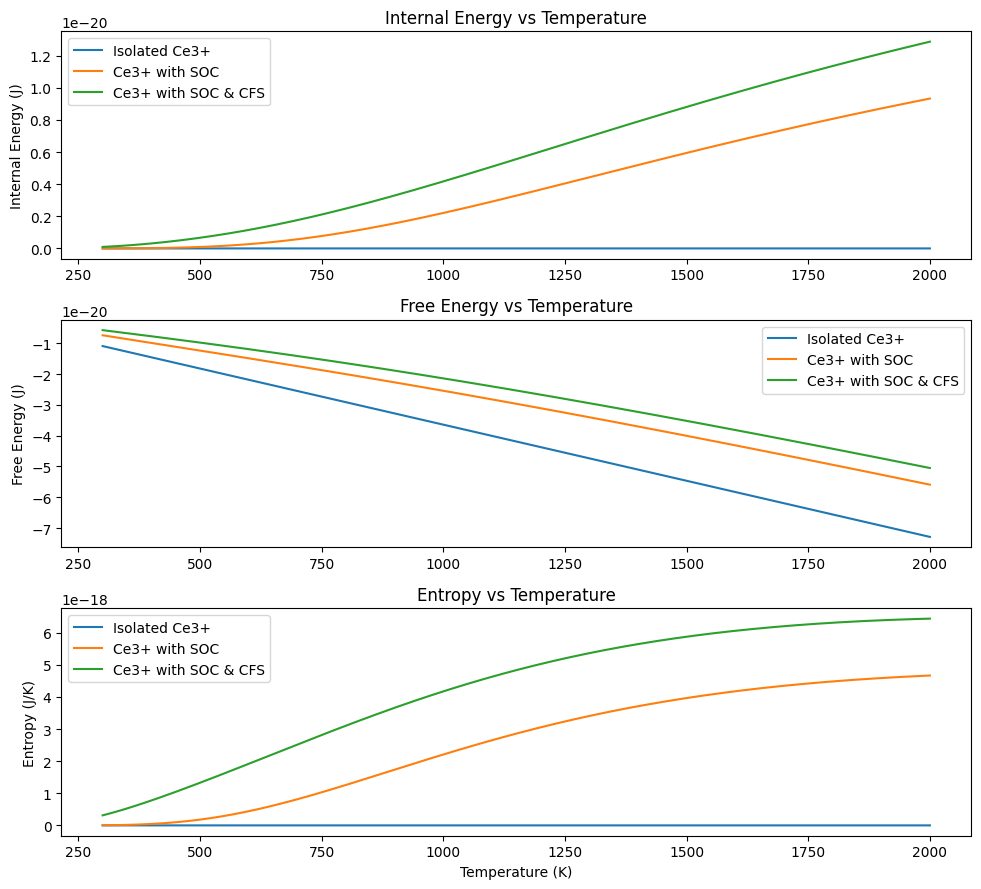

In [6]:
# Plotting the thermodynamic properties
plt.figure(figsize=(10, 9))

# Subplot for Internal Energy
plt.subplot(3, 1, 1)

# Plot Temperature vs Internal Energy when case = 'Isolated Ce3+', 'Ce3+ with SOC', 'Ce3+ with SOC & CFS', respectively.
for case in ['Isolated Ce3+', 'Ce3+ with SOC', 'Ce3+ with SOC & CFS']:
    plt.plot(df[df['Case'] == case]['Temperature (K)'], df[df['Case'] == case]['Internal Energy (J)'], label = case)
plt.ylabel("Internal Energy (J)")
plt.title("Internal Energy vs Temperature")
plt.legend()

# Subplot for Free Energy
plt.subplot(3, 1, 2)

# Plot Temperature vs Free Energy when case = 'Isolated Ce3+', 'Ce3+ with SOC', 'Ce3+ with SOC & CFS', respectively.
for case in ['Isolated Ce3+', 'Ce3+ with SOC', 'Ce3+ with SOC & CFS']:
    plt.plot(df[df['Case'] == case]['Temperature (K)'], df[df['Case'] == case]['Free Energy (J)'], label = case)
plt.ylabel("Free Energy (J)")
plt.title("Free Energy vs Temperature")
plt.legend()

# Subplot for Entropy
plt.subplot(3, 1, 3)

# Plot Temperature vs Entropy when case = 'Isolated Ce3+', 'Ce3+ with SOC', 'Ce3+ with SOC & CFS', respectively.
for case in ['Isolated Ce3+', 'Ce3+ with SOC', 'Ce3+ with SOC & CFS']:
    plt.plot(df[df['Case'] == case]['Temperature (K)'],  df[df['Case'] == case]['Entropy (J/K)'], label = case)

plt.ylabel("Entropy (J/K)")
plt.xlabel("Temperature (K)")
plt.title("Entropy vs Temperature")
plt.legend()

plt.tight_layout()
plt.savefig('Thermodynamic Properties of Ce(3) in Different Environments.png') # Save the plot as a png file.
plt.show()